# **Partie A - Dynamique sans courant injecté (I = 0)**
##A.1 — Formulation et visualisation de la dynamique intrinsèque.  

Réécriture de l’équation différentielle sous la forme û=f(u), et tracé du champ de phase.


Equilibrium points (mV): [-70.         -36.48809938]


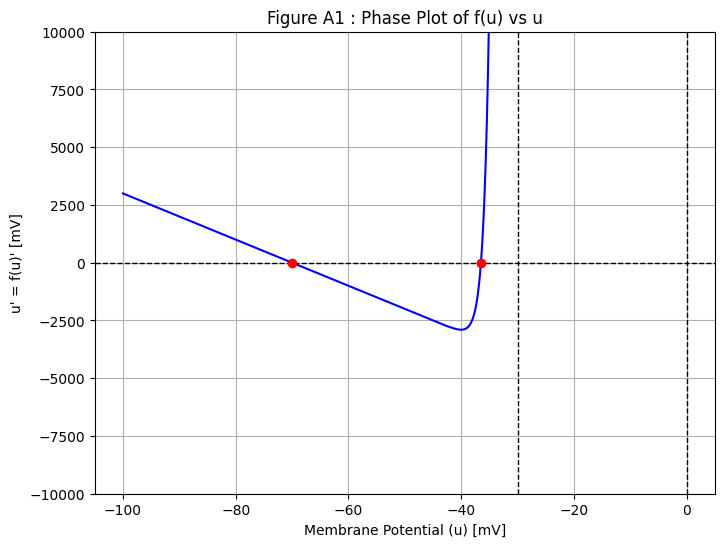

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

tau = 10e-3 #sec
u_r = -70e-3 #volts
delta_T = 1e-3 #volts
theta_rh = -40e-3 #volts

#Rm*I => 0 as I = 0 therefore not in this function
def dudt(u):
    return (1/tau) * (-(u - u_r) + delta_T * np.exp((u - theta_rh) / delta_T))

#identify where f(u) = 0
initial_guesses = [-72e-3, -35e-3]
equilibrium_points = fsolve(dudt, initial_guesses)
equilibrium_points_mV = equilibrium_points * 1e3
print("Equilibrium points (mV):", equilibrium_points_mV)

u = np.linspace(-0.1, 0, 1000)
fu = dudt(u)

plt.figure(figsize=(8, 6))
plt.ylim(-10000, 10000)
plt.plot(u * 1e3, fu * 1e3, label='$f(u)$', color='b')
plt.axhline(0, color='black', linewidth=1, linestyle = "--")
plt.axvline(0, color='black', linewidth=1, linestyle = "--")
plt.axvline(-30, color='black', linewidth=1, linestyle = "--")
plt.grid(True)
plt.title("Figure A1 : Phase Plot of f(u) vs u")
plt.xlabel("Membrane Potential (u) [mV]")
plt.ylabel("u' = f(u)' [mV]")
plt.plot(equilibrium_points_mV, np.zeros_like(equilibrium_points_mV), 'ro', label='Equilibria');

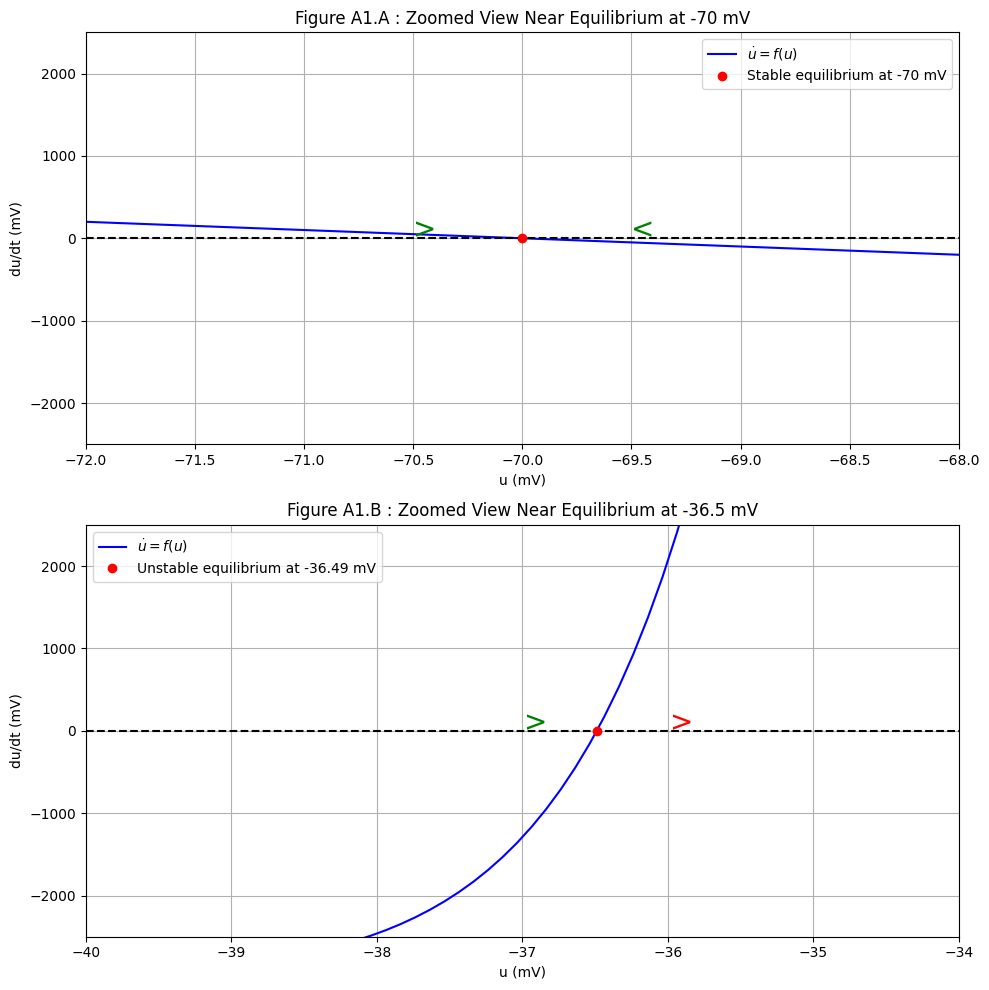

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(u * 1e3, fu * 1e3, 'b-', label=r"$\dot{u} = f(u)$")
ax1.axhline(0, color='k', linestyle='--')
ax1.plot(equilibrium_points_mV[0], 0, 'ro', label='Stable equilibrium at -70 mV')

ax1.text(equilibrium_points_mV[0]-0.5, -0.5, '>', fontsize=20, color='green')
ax1.text(equilibrium_points_mV[0]+0.5, -0.5, '<', fontsize=20, color='green')

ax1.set_xlim(-72, -68)
ax1.set_ylim(-2500, 2500)
ax1.set_title('Figure A1.A : Zoomed View Near Equilibrium at -70 mV')
ax1.set_xlabel('u (mV)')
ax1.set_ylabel("du/dt (mV)")
ax1.grid(True)
ax1.legend()

ax2.plot(u * 1e3, fu * 1e3, 'b-', label=r"$\dot{u} = f(u)$")
ax2.axhline(0, color='k', linestyle='--')
ax2.plot(equilibrium_points_mV[1], 0, 'ro', label=f'Unstable equilibrium at {equilibrium_points_mV[1]:.2f} mV')

ax2.text(equilibrium_points_mV[1]-0.5, -.5, '>', fontsize=20, color='green')
ax2.text(equilibrium_points_mV[1]+0.5, -.5,'>', fontsize=20, color='red')

ax2.set_xlim(-40, -34)
ax2.set_ylim(-2500, 2500)
ax2.set_title(f'Figure A1.B : Zoomed View Near Equilibrium at {equilibrium_points_mV[1]:.1f} mV')
ax2.set_xlabel('u (mV)')
ax2.set_ylabel("du/dt (mV)")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

##A.2 — Analyse locale autour du seuil de rhéobase.

Calcul de la courbure de f(u) en θrh et rôle du paramètre ΔT.

In [6]:

tau = 10e-3 #sec
u_r = -70e-3 #volts
delta_T = 1e-3 #volts
theta_rh = -40e-3 #volts
Rm = 4 #Mohms
I = 0

def f(u):
    return (1/tau) * (-(u - u_r) + delta_T * np.exp((u - theta_rh) / delta_T) + (Rm * I))

# Dérivée première avec différence centrale
def numerical_derivative(f, u, du=1e-6):
    return (f(u + du) - f(u - du)) / (2 * du)

# Dérivée seconde avec différences finies
def numerical_second_derivative(f, u, du=1e-6):
    return (f(u + du) - 2 * f(u) + f(u - du)) / (du ** 2)
# Calculs
f_prime_value = numerical_derivative(f, theta_rh)
f_double_prime_value = numerical_second_derivative(f, theta_rh)

print("First derivative at theta_rh = u =", theta_rh, "volts is", f_prime_value)
print("This value is essentially == 0 implying that that we rest near a point where there is a local min or max (which is confirmed in visually in the graph above (Figure A1))\n ")
print("Second derivative at theta_rh = u =", theta_rh, "volts is", f_double_prime_value)
print("This value means the curvature at this point is rapidly changing, which we expect as were about to enter a spiking regime, and we approach our unstable eq point \n")
print("delta_T in this model represents a scaling factor that controls the steepness of the exponential term in the equation")

First derivative at theta_rh = u = -0.04 volts is 1.666666804567285e-05
This value is essentially == 0 implying that that we rest near a point where there is a local min or max (which is confirmed in visually in the graph above (Figure A1))
 
Second derivative at theta_rh = u = -0.04 volts is 100000.00738585868
This value means the curvature at this point is rapidly changing, which we expect as were about to enter a spiking regime, and we approach our unstable eq point 

delta_T in this model represents a scaling factor that controls the steepness of the exponential term in the equation


##A.3 — Simulation de la dynamique pour différentes conditions initiales.  


Étude numérique de l’évolution de u(t) pour u(0)=−80, −50 et −35 mV. Détermination du seuil effectif Θ I=0.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


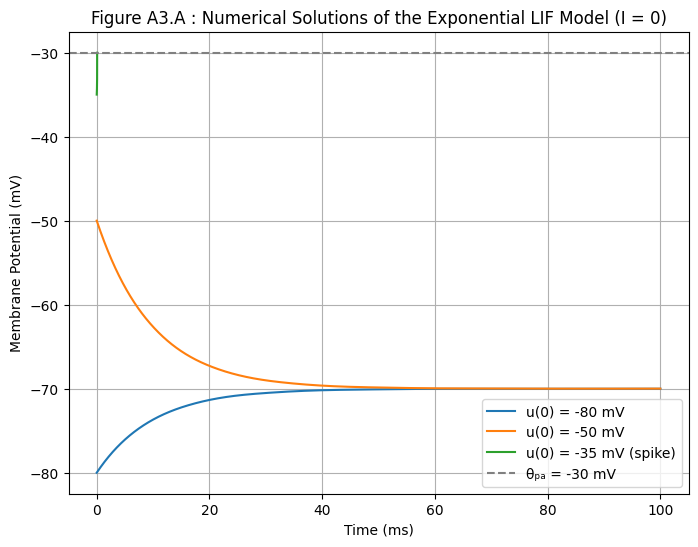



We can observe that for u(0) = -80mv or = -50mv, the system returns naturally to its stable equilibrium (resting potential = -70mv)
We can observe that for u(0) -35mv, although not at the unstable eq point, the system seems to be rapidly depolarizing (nearly vertical line on our plot) and approaching the $theta_pa$
This indicates that the system has likely already diverged and the effective threshold is earlier 


In [7]:
from scipy.integrate import solve_ivp

tau = 10e-3  # sec
u_r = -70e-3  # volts
delta_T = 1e-3  # volts
theta_rh = -40e-3  # volts
theta_pa = -30e-3  # volts
Rm = 4  # MOhms
I = 0

def dudt(t, u):
  #clip to avoid Nan or inf
  exp_term = np.exp(np.clip((u[0] - theta_rh) / delta_T, -100, 50))
  return (-(u[0] - u_r) + delta_T * exp_term + (Rm * I)) / tau

#defined so that solve_ivp knows to avoid overflow by integrating at exact val (will exponentially blow up if truly calculated)
def spike_event(t, u):
  return theta_pa - u[0]

spike_event.terminal = True
spike_event.direction = -1


t_span = (0, 0.1)
t_eval = np.linspace(0, 0.1, 10000000)

initial_conditions = [-80e-3, -50e-3, -35e-3]

plt.figure(figsize=(8, 6))
for u0 in initial_conditions:
    sol = solve_ivp(dudt, t_span, [u0], t_eval=t_eval, events=spike_event)

    # Plot all available points up to threshold (behavior of system for u(0) = -35mv is unpredictable and difficult to graph)
    if sol.t_events[0].size > 0:
        t_spike = sol.t_events[0][0]
        idx = sol.t <= t_spike
        label = f'u(0) = {u0*1e3:.0f} mV (spike)'
    else:
        idx = np.ones_like(sol.t, dtype=bool)
        label = f'u(0) = {u0*1e3:.0f} mV'

    plt.plot(sol.t[idx]*1e3, sol.y[0][idx]*1e3, label=label)

# Threshold line and plotting
plt.axhline(theta_pa * 1e3, linestyle='--', color='gray', label='θₚₐ = -30 mV')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Figure A3.A : Numerical Solutions of the Exponential LIF Model (I = 0)')
plt.legend()
plt.grid(True)
plt.show();

print("\n")
print("We can observe that for u(0) = -80mv or = -50mv, the system returns naturally to its stable equilibrium (resting potential = -70mv)")
print("We can observe that for u(0) -35mv, although not at the unstable eq point, the system seems to be rapidly depolarizing (nearly vertical line on our plot) and approaching the $theta_pa$")
print("This indicates that the system has likely already diverged and the effective threshold is earlier ")

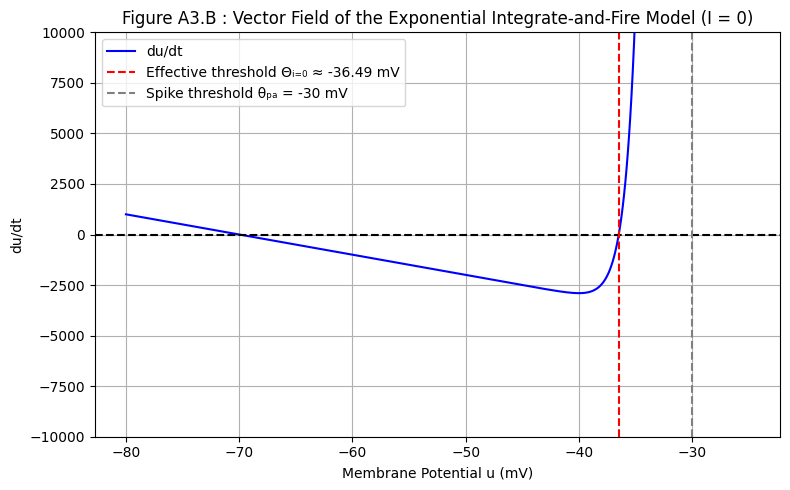

In [8]:
from scipy.optimize import fsolve
tau = 10e-3 #sec
u_r = -70e-3 #volts
delta_T = 1e-3 #volts
theta_rh = -40e-3 #volts

#Rm*I => 0 as I = 0 therefore not in this function
def dudt(u):
    return (1/tau) * (-(u - u_r) + delta_T * np.exp((u - theta_rh) / delta_T))

# Find effective threshold ΘI=0 numerically
theta_I0 = fsolve(dudt, -35e-3)[0]

u_vals = np.linspace(-80e-3, -25e-3, 500)
du_dt = (-(u_vals - u_r) + delta_T * np.exp((u_vals - theta_rh) / delta_T)) / tau

plt.figure(figsize=(8, 5))
plt.plot(u_vals * 1e3, du_dt * 1e3, label='du/dt', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(theta_I0 * 1e3, color='red', linestyle='--', label=f'Effective threshold Θᵢ₌₀ ≈ {theta_I0*1e3:.2f} mV')
plt.axvline(theta_pa * 1e3, color='gray', linestyle='--', label=f'Spike threshold θₚₐ = {theta_pa*1e3:.0f} mV')

plt.xlabel('Membrane Potential u (mV)')
plt.ylabel('du/dt')
plt.title('Figure A3.B : Vector Field of the Exponential Integrate-and-Fire Model (I = 0)')
plt.legend()
plt.ylim(-10000, 10000)
plt.grid(True)
plt.tight_layout()
plt.show();



##A.4 — Comparaison avec le modèle LIF linéaire (cas I = 0).

Réflexion sur la différence de seuil entre modèle linéaire et exponentiel.

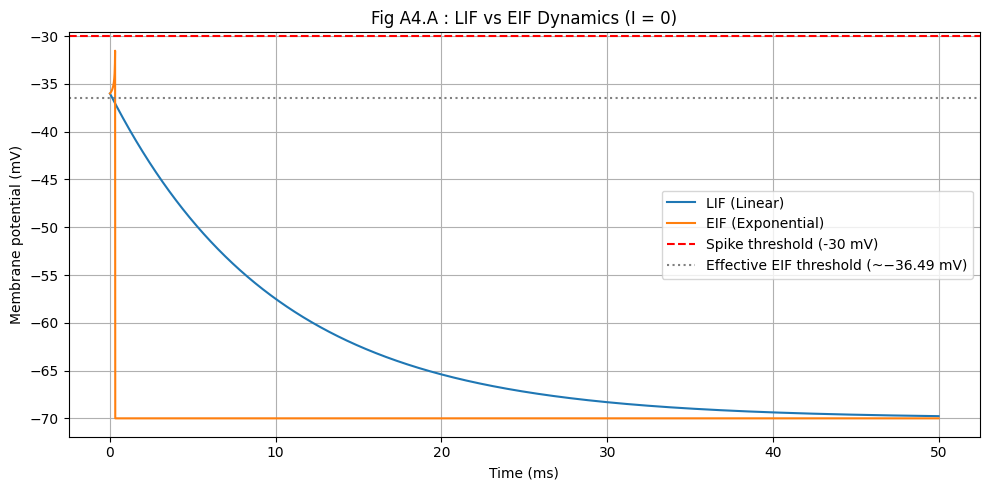

In [9]:
u_r = -70e-3  # volts
delta_T = 1e-3  # volts
theta_rh = -40e-3  # volts
Rm = 4  # MOhms
I = 0  # current

T = 0.05
dt = 1e-5
time = np.arange(0, T, dt)

u0 = -36e-3

u_lif = np.zeros_like(time)
u_eif = np.zeros_like(time)

u_lif[0] = u0
u_eif[0] = u0


# LIF dynamics (I = 0)
def dudt_lin(u):
    return (1 / tau) * (-(u - u_r))

# EIF (I = 0)
def dudt_exp(u):
    return (1/tau) * (-(u - u_r) + delta_T * np.exp((u - theta_rh) / delta_T))

# Integration loop
for i in range(1, len(time)):
    # LIF
    du_lif = dudt_lin(u_lif[i-1])
    u_lif[i] = u_lif[i-1] + dt * du_lif

    # EIF
    du_eif = dudt_exp(u_eif[i-1])
    u_eif[i] = u_eif[i-1] + dt * du_eif

    # Spike condition
    if u_eif[i] > theta_pa:
        u_eif[i] = u_r  # reset to resting potential

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time * 1e3, u_lif * 1e3, label='LIF (Linear)')
plt.plot(time * 1e3, u_eif * 1e3, label='EIF (Exponential)')
plt.axhline(y=theta_pa * 1e3, color='r', linestyle='--', label='Spike threshold (-30 mV)')
plt.axhline(y=-36.49, color='gray', linestyle=':', label='Effective EIF threshold (~−36.49 mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Fig A4.A : LIF vs EIF Dynamics (I = 0)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

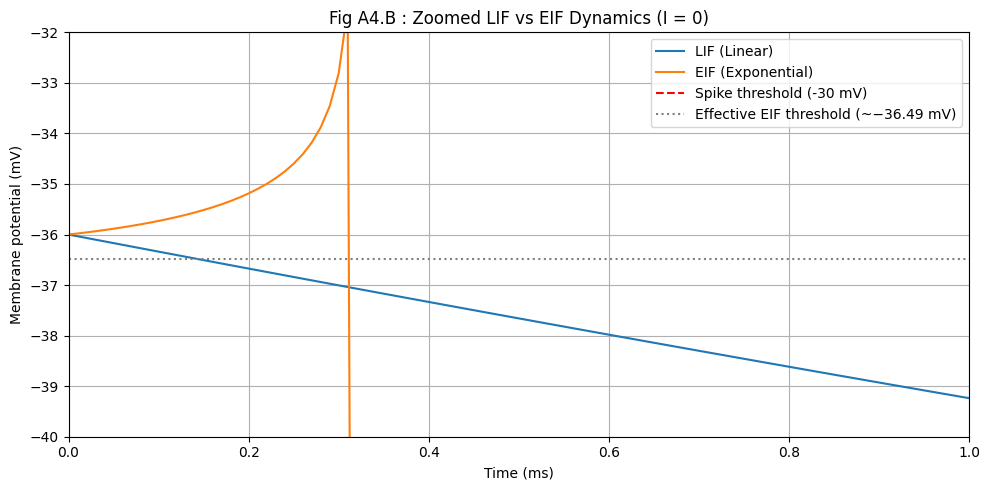

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(time * 1e3, u_lif * 1e3, label='LIF (Linear)')
plt.plot(time * 1e3, u_eif * 1e3, label='EIF (Exponential)')
plt.axhline(y=theta_pa * 1e3, color='r', linestyle='--', label='Spike threshold (-30 mV)')
plt.axhline(y=-36.49, color='gray', linestyle=':', label='Effective EIF threshold (~−36.49 mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Fig A4.B : Zoomed LIF vs EIF Dynamics (I = 0)')
plt.legend()
plt.ylim(-40, -32)
plt.xlim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Partie B - Effet d’un courant injecté**


##B.1 — Réponse du modèle à une impulsion carrée de courant.


Simulation de la dynamique avec I(t)=I0 entre 100 ms et 400 ms. Étude des points fixes.

In [11]:
tau = 10.0 # ms constant de temps
u_r = -70.0 # mV potentiel de repos
R_m = 4.0 # MOhm resistantce
delta_T = 1 # mV
theta_rh = -40.0 # mV
theta_pa = -30.0 # mV
I_0 = 6.0 # nA amplitude

In [12]:
def I_carree(t, I):
    return I if (200 <= t <= 400) else 0

def potentiel_action(u, t, theta=theta_rh, I_cur=I_0):
    # EDO pour le PA membranaire avec une impulsion carrée de courant
    return (-(u - u_r) + delta_T * np.exp((u - theta) / delta_T) + R_m * I_carree(t, I_cur)) / tau

def jacobian(u, theta=theta_rh):
    return (-1 + np.exp((u - theta) / delta_T)) / tau

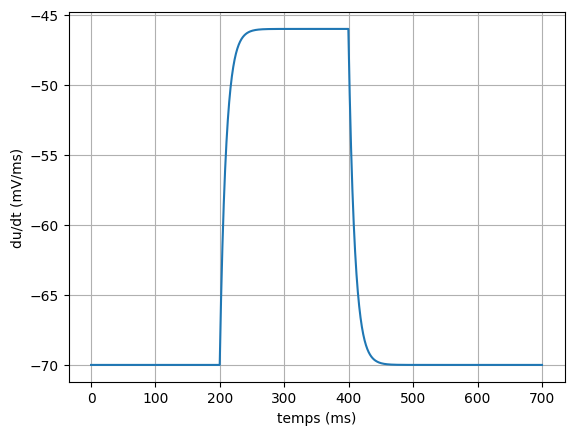

In [13]:
# Vecteur de temps
t = np.linspace(0, 700, 1000)  # 100ms - 400 ms

# Condition Initiale
u0 = u_r  # (mV)

# Résoudre ODE avec u initial et vecteur de temps
u_values = [u0]
dt = t[1] - t[0]
for ti in t[1:]:
    u_cur = u_values[-1]
    if u_cur >= theta_pa:
        u_values.append(u_r)  # Reset après un spike
    else:
        u_next = u_cur + potentiel_action(u_cur, ti, theta_rh) * dt
        u_values.append(u_next)

plt.plot(t, u_values)
plt.xlabel('temps (ms)')
plt.ylabel(r'du/dt (mV/ms)')
plt.grid()


In [14]:
def g(u, theta=theta_rh, I_curr=I_0):
    # du/dt = 0
    return delta_T * np.exp((u - theta) / delta_T) - (u - u_r - R_m * I_curr)

In [15]:
# Recherche des points fixes + Stabilité avec la Jacobienne
U = np.linspace(-70, -30, 1000)
g_vals = g(U)
point_fixes = []
jacobs = []
for i in range(len(U) - 1):
    if g_vals[i] * g_vals[i + 1] < 0:
        point_fixe = (U[i] + U[i + 1]) / 2
        point_fixes.append(point_fixe)
        jacobs.append(jacobian(point_fixe))

print("Points fixes approximatifs :", point_fixes)
print("Stabilité des points fixes :", ["stable" if x < 0 else "instable" for x in jacobs])

Points fixes approximatifs : [np.float64(-45.995995995996), np.float64(-37.907907907907905)]
Stabilité des points fixes : ['stable', 'instable']


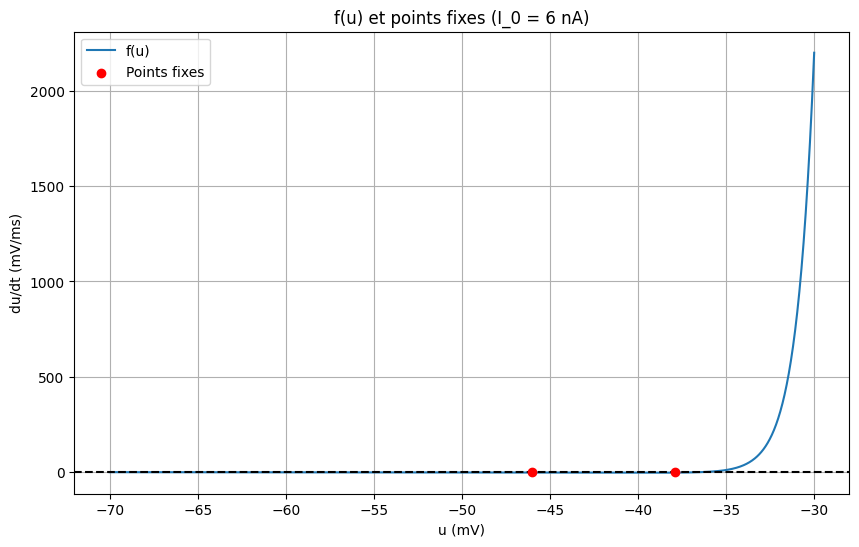

In [16]:
U = np.linspace(-70, -30, 1000)
f_u = [potentiel_action(u, t=100) for u in U]
# Tracé
plt.figure(figsize=(10, 6))
plt.plot(U, f_u, label="f(u)")
plt.axhline(0, color='k', linestyle='--')
plt.scatter(point_fixes, [0]*len(point_fixes), color='r', label="Points fixes", zorder=5)
plt.xlabel("u (mV)")
plt.ylabel("du/dt (mV/ms)")
plt.title("f(u) et points fixes (I_0 = 6 nA)")
plt.legend()
plt.grid()
plt.show()

<font color='red'> Il y a 2 points fixes u*=-46mV (stable) et u*=-38mV (instable)

##B.2 — Étude du passage à l’activité périodique : calcul du rhéobase

Variation progressive de I, calcul analytique du rhéobase et interprétation du rôle de θrh.

Courrant Injecté:  6.0
Points fixes approximatifs : [np.float64(-45.995995995996), np.float64(-37.907907907907905)]
Jacobien des Points fixes : [np.float64(-0.09975113029934103), np.float64(0.7101847256958365)]


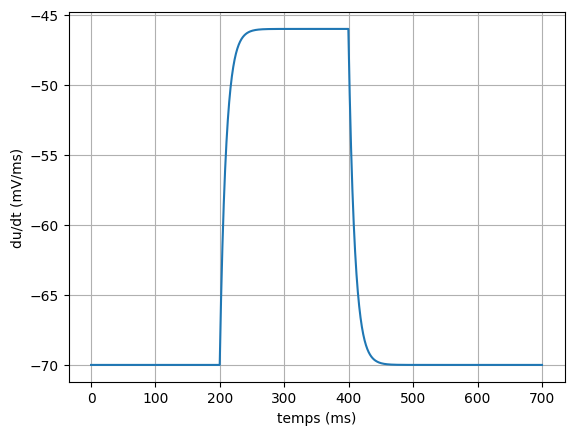

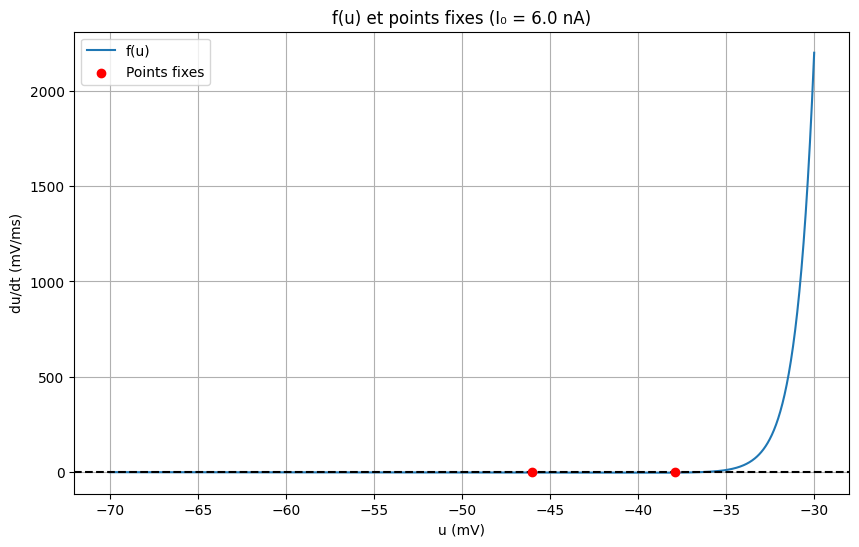

Courrant Injecté:  6.444444444444445
Points fixes approximatifs : [np.float64(-44.19419419419419), np.float64(-38.188188188188185)]
Jacobien des Points fixes : [np.float64(-0.09849171085519327), np.float64(0.5121528448390512)]


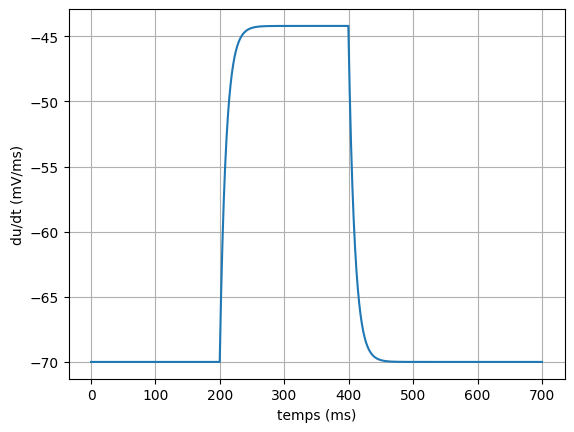

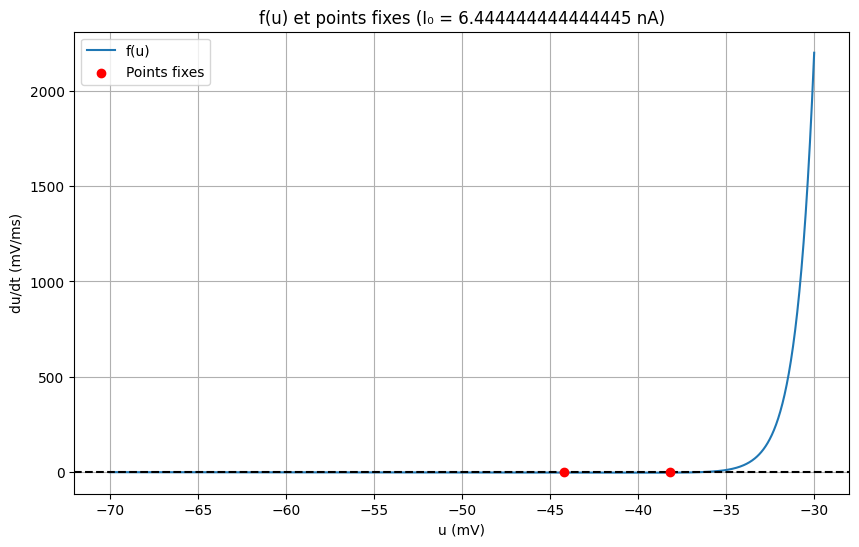

Courrant Injecté:  6.888888888888889
Points fixes approximatifs : [np.float64(-42.35235235235235), np.float64(-38.668668668668666)]
Jacobien des Points fixes : [np.float64(-0.09048549159987432), np.float64(0.2786080561425466)]


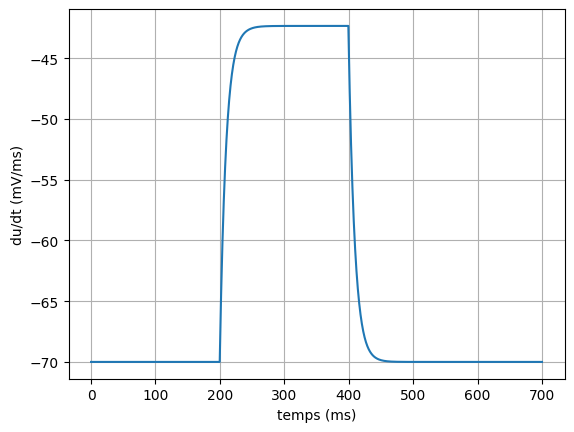

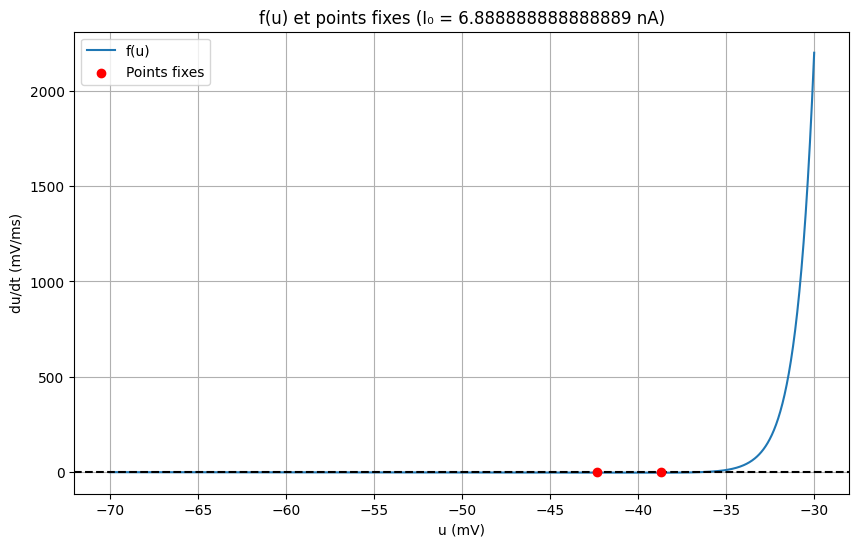

Courrant Injecté:  7.333333333333333
Points fixes approximatifs : []
Jacobien des Points fixes : []


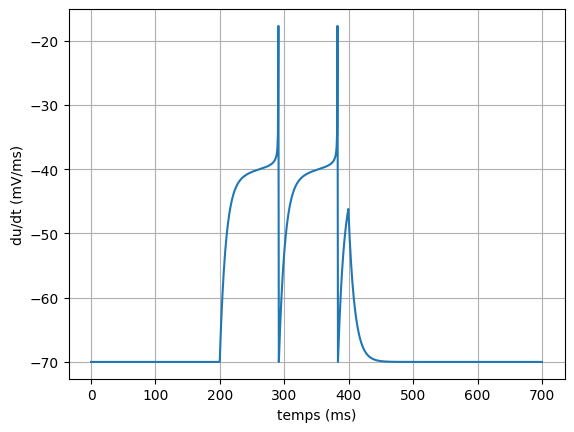

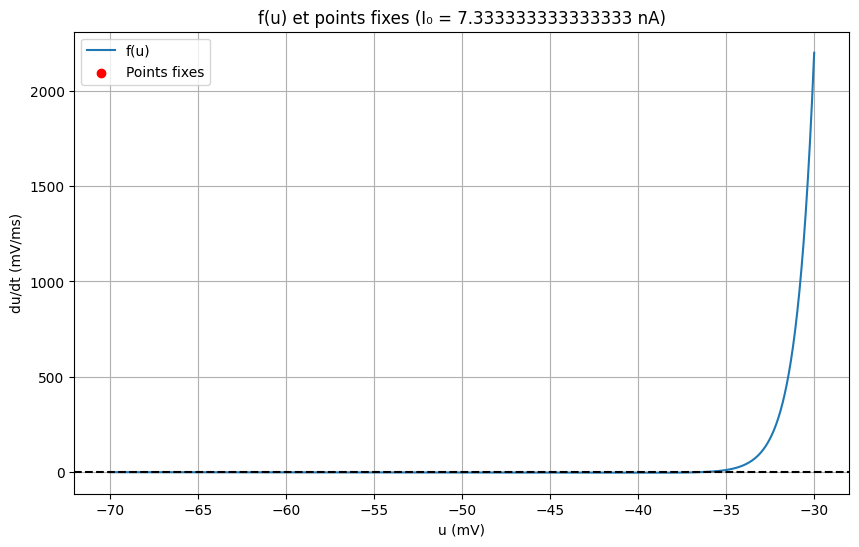

Courrant Injecté:  7.777777777777778
Points fixes approximatifs : []
Jacobien des Points fixes : []


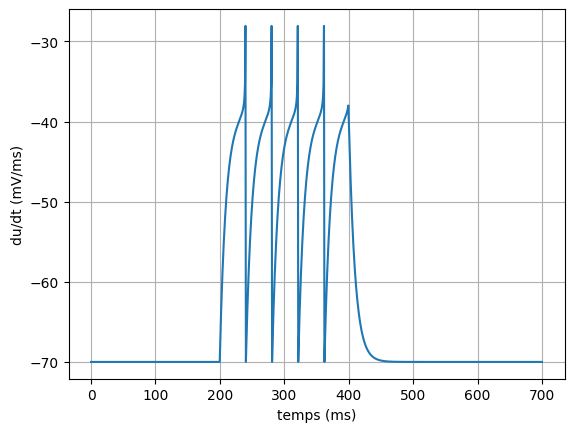

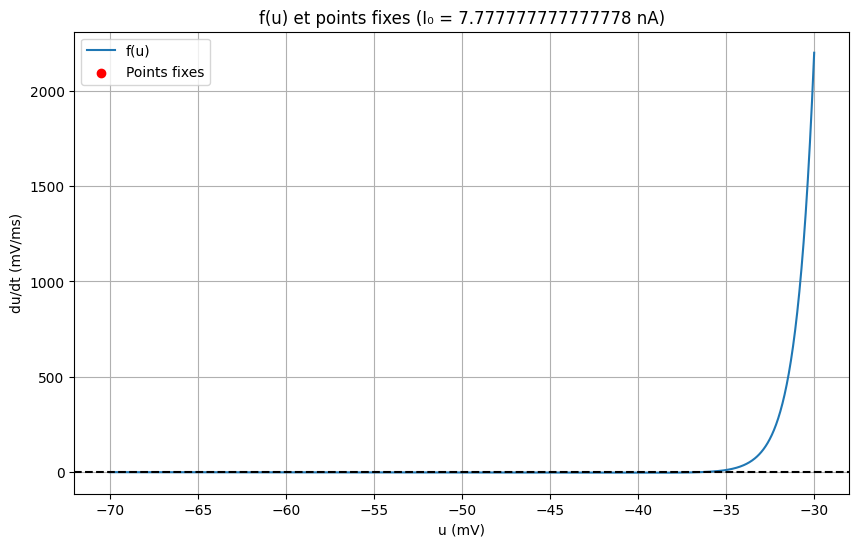

Courrant Injecté:  8.222222222222221
Points fixes approximatifs : []
Jacobien des Points fixes : []


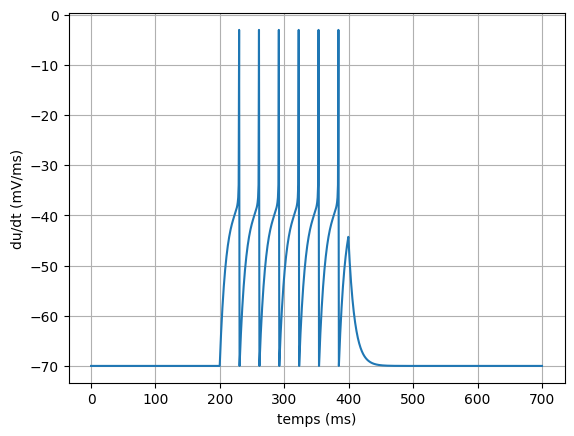

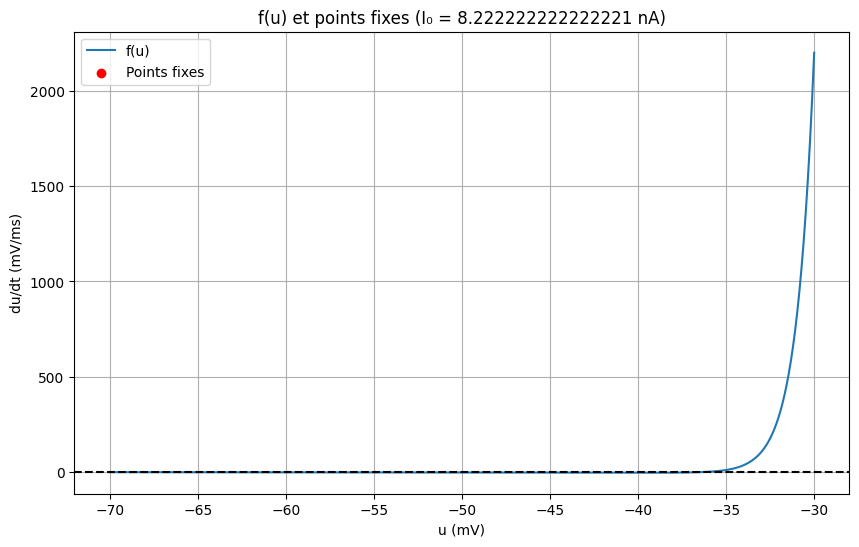

Courrant Injecté:  8.666666666666666
Points fixes approximatifs : []
Jacobien des Points fixes : []


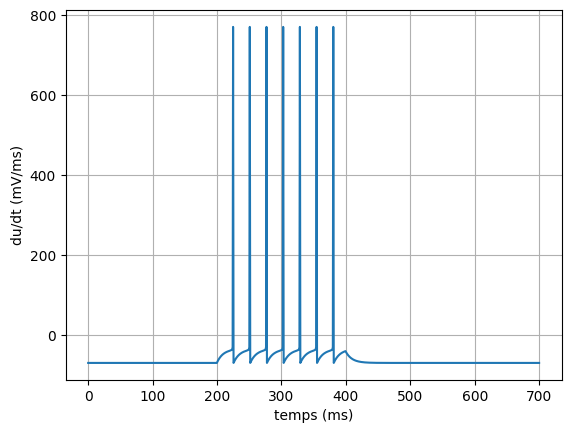

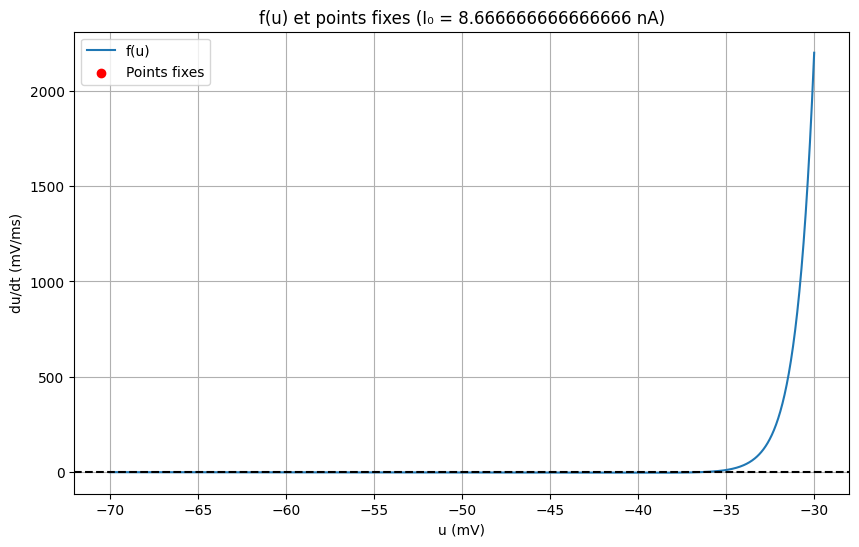

Courrant Injecté:  9.11111111111111
Points fixes approximatifs : []
Jacobien des Points fixes : []


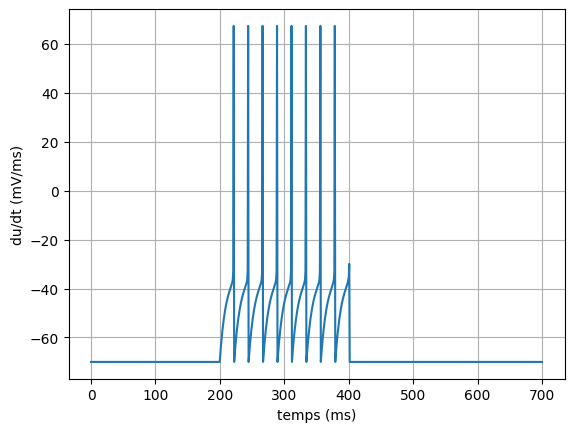

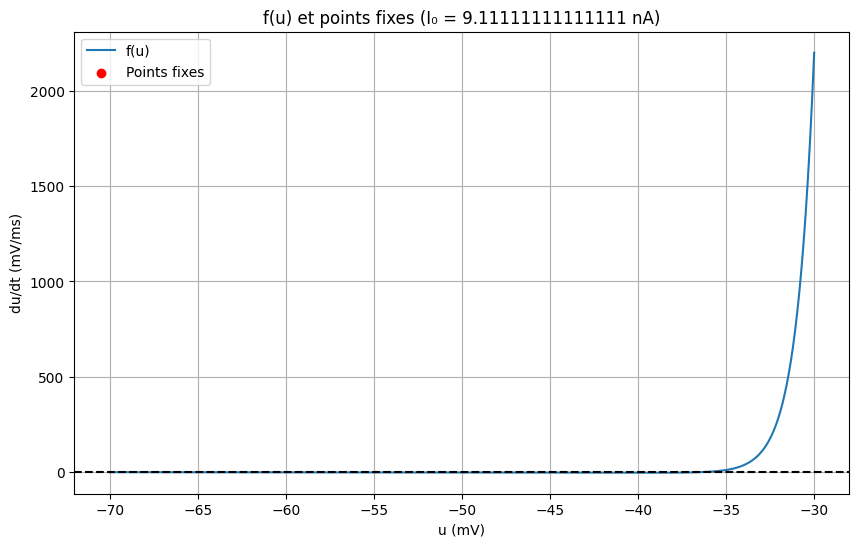

Courrant Injecté:  9.555555555555555
Points fixes approximatifs : []
Jacobien des Points fixes : []


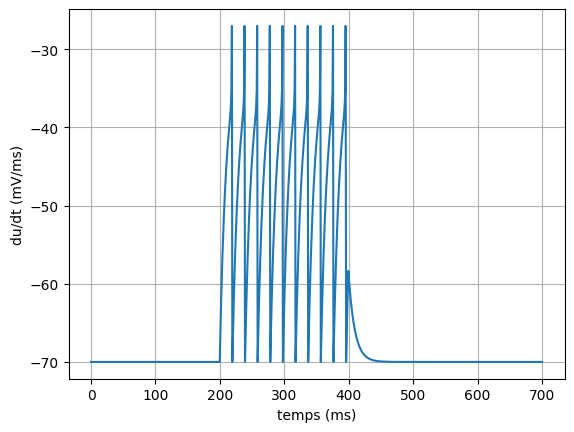

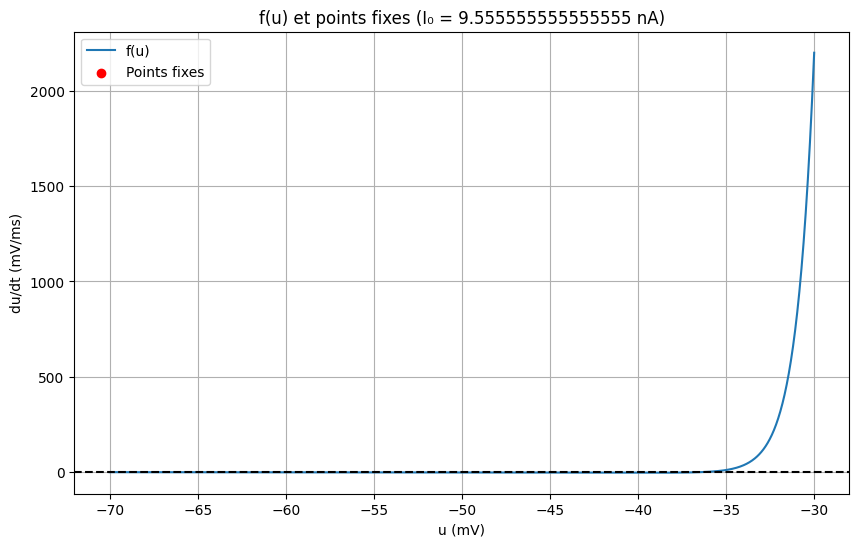

Courrant Injecté:  10.0
Points fixes approximatifs : []
Jacobien des Points fixes : []


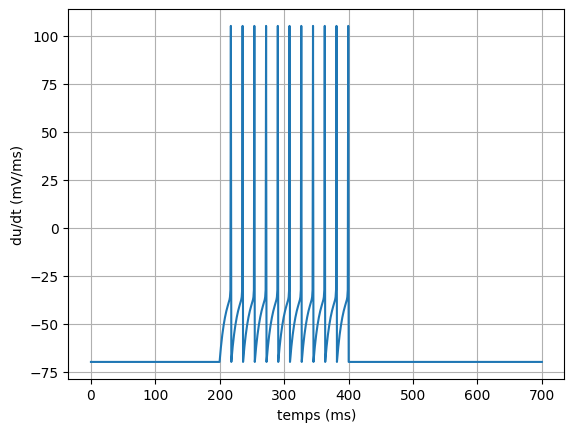

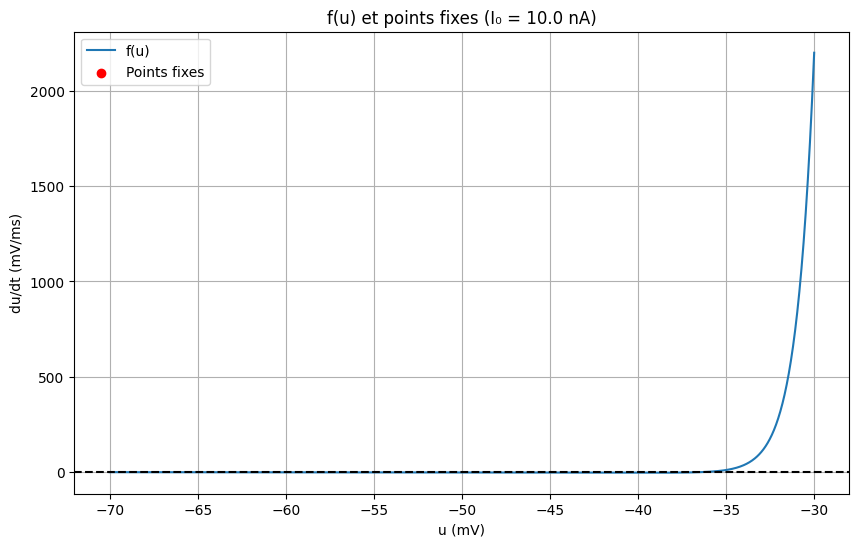

In [17]:
#Vecteur de temps
t = np.linspace(100, 400, 500)  # 100ms - 400 ms
I = np.linspace(6, 10, 10)

for Ii in I:
    print("Courrant Injecté: ", Ii)
    t = np.linspace(0, 700, 1000)  # 100ms - 400 ms

    # Condition Initiale
    u0 = u_r  # (mV)

    # Résoudre ODE avec u initial et vecteur de temps
    u_values = [u0]
    dt = t[1] - t[0]
    for ti in t[1:]:
        u_cur = u_values[-1]
        if u_cur >= theta_pa:
            u_values.append(u_r)  # Reset après un spike
        else:
            u_next = u_cur + potentiel_action(u_cur, ti, theta_rh, I_cur=Ii) * dt
            u_values.append(u_next)

    plt.plot(t, u_values)
    plt.xlabel('temps (ms)')
    plt.ylabel(r'du/dt (mV/ms)')
    plt.grid()

    # Trouver point fixes
    U = np.linspace(-70, -30, 1000)
    g_vals = g(U, I_curr=Ii)
    point_fixes = []
    jacobs = []
    for i in range(len(U) - 1):
        if g_vals[i] * g_vals[i + 1] < 0:
            point_fixe = (U[i] + U[i + 1]) / 2
            point_fixes.append(point_fixe)
            jacobs.append(jacobian(point_fixe))

    print("Points fixes approximatifs :", point_fixes)
    print("Jacobien des Points fixes :", jacobs)

    f_u = [potentiel_action(u, t=100) for u in U]
    # Tracé
    plt.figure(figsize=(10, 6))
    plt.plot(U, f_u, label="f(u)")
    plt.axhline(0, color='k', linestyle='--')
    plt.scatter(point_fixes, [0]*len(point_fixes), color='r', label="Points fixes", zorder=5)
    plt.xlabel("u (mV)")
    plt.ylabel("du/dt (mV/ms)")
    plt.title(f"f(u) et points fixes (I₀ = {Ii} nA)")
    plt.legend()
    plt.grid()
    plt.show()


    print("=" * 100)


# Observation sur les courbes
* Pour I=6 nA, l’impulsion peut déclencher un ou plusieurs spikes, mais ne maintient pas une activité périodique à long terme.

* Pour I=7.75 nA, le système est au seuil : une activité oscillante instable peut apparaître.

* Pour I=9 nA, le neurone entre dans un régime de spikes réguliers.

In [18]:
# Paramètres
u_r = -70e-3  # volts
u_rh = -40e-3  # volts
delta_T = 1e-3  # volts
Rm = 4  # Mohms

# Conditions de la bifurcation col-noeud sont f(u) = du/dt = 0 et g(u)/du = 0
# Pour g(u)/du = 0, il faut:
# d[delta_T * np.exp((u - theta_rh)/delta_T) - (u - u_r - R_m * I)]/dt = 0
# On obtient: np.exp(u - theta_rh) = u - u_r
# Avec theta_rh = -40, on a:
# np.exp(u + 40) = 1
# donc, u = -40 = u_r
# Alors, pour trouver le courant rhéobase,
# le potentiel d'action rhéobase doit être égal au seuil rhéobase
#u_rh = theta_rh
# Équation des points fixes : -(u - ur) + delta_T * exp((u - theta_rh)/delta_T) + R_m * I = 0
# À u = theta_rh, exp(0) = 1
Rm_I = (u_rh - u_r) - delta_T * np.exp(0)
I_rh = Rm_I / Rm
# Conversion en nanoampères (1 A = 1e9 nA)
I_rh_nA = I_rh * 1e3

print(f"Courant rhéobase : {I_rh_nA:.2f} nA")

Courant rhéobase : 7.25 nA



## B.3 — Comparaison avec le modèle LIF linéaire

Étude comparative de l’apparition des potentiels d’action périodiques, et réflexion sur la dépendance du seuil à la stimulation.

B3.1 : Modèle LIF linéaire sans courant injecté (I = 0)

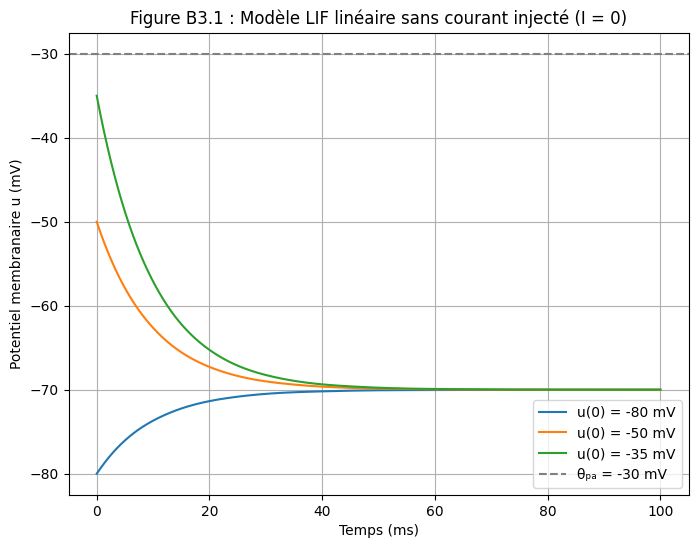

In [19]:


tau = 10e-3          # sec
u_r = -70e-3         # volts (potentiel de repos)
theta_pa = -30e-3    # volts (seuil de PA)
I = 0                # courant injecté nul
Rm = 4               # MOhms, pas utilisé ici car I=0

# modèle LIF linéaire
def dudt_linear(t, u):
    return [-(u[0] - u_r) / tau]

# événement : arrêt de l’intégration quand u atteint le seuil
#defined so that solve_ivp knows to avoid overflow by integrating at exact val (will exponentially blow up if truly calculated)
def spike_event(t, u):
    return theta_pa - u[0]

spike_event.terminal = True
spike_event.direction = -1

# Temps de simulation
t_span = (0, 0.1)
t_eval = np.linspace(0, 0.1, 100000)

# Conditions initiales à tester
initial_conditions = [-80e-3, -50e-3, -35e-3]

# Tracé
plt.figure(figsize=(8, 6))
for u0 in initial_conditions:
    sol = solve_ivp(dudt_linear, t_span, [u0], t_eval=t_eval, events=spike_event)

    if sol.t_events[0].size > 0:
        t_spike = sol.t_events[0][0]
        idx = sol.t <= t_spike
        label = f'u(0) = {u0*1e3:.0f} mV (spike)'
    else:
        idx = np.ones_like(sol.t, dtype=bool)
        label = f'u(0) = {u0*1e3:.0f} mV'

    plt.plot(sol.t[idx]*1e3, sol.y[0][idx]*1e3, label=label)

# Ligne de seuil
plt.axhline(theta_pa * 1e3, linestyle='--', color='gray', label='θₚₐ = -30 mV')
plt.xlabel('Temps (ms)')
plt.ylabel('Potentiel membranaire u (mV)')
plt.title('Figure B3.1 : Modèle LIF linéaire sans courant injecté (I = 0)')
plt.legend()
plt.grid(True)
plt.show()


B3.2 : LIF linéaire avec courant injecté (I = 6 nA)

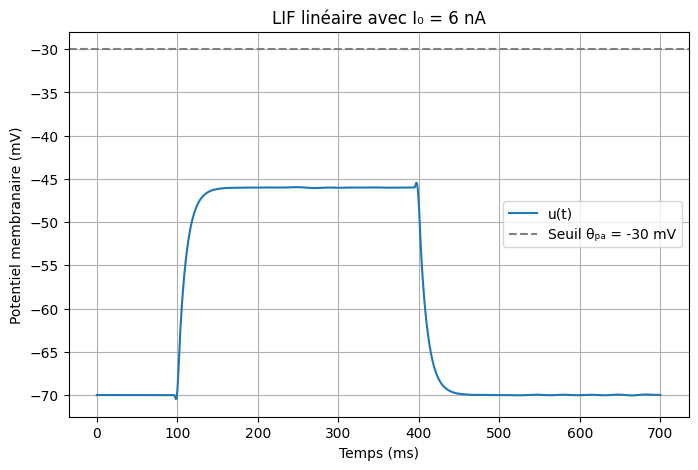

In [20]:


# Paramètres
tau = 10e-3        # sec
u_r = -70e-3       # V
theta_pa = -30e-3  # seuil PA
Rm = 4e6           # ohms
#I0 = 20e-9         # 20 nA
I0 = 6e-9            # A (6 nA)

def I_carree(t):
    return I0 if 0.1 <= t <= 0.4 else 0

def dudt_linear(t, u):
    I_t = I_carree(t)
    return [(-(u[0] - u_r) + Rm * I_t) / tau]

# Simulation
t_span = (0, 0.7)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
u0 = [-70e-3]

sol = solve_ivp(dudt_linear, t_span, u0, t_eval=t_eval)


plt.figure(figsize=(8, 5))
plt.plot(sol.t * 1e3, sol.y[0] * 1e3, label="u(t)")
plt.axhline(theta_pa * 1e3, linestyle='--', color='gray', label='Seuil θₚₐ = -30 mV')
plt.xlabel("Temps (ms)")
plt.ylabel("Potentiel membranaire (mV)")
plt.title(f"LIF linéaire avec I₀ = {I0 * 1e9:.0f} nA")
plt.grid(True)
plt.legend()
plt.show()


Lorsqu’on applique une impulsion carrée de courant I0=6nA entre 100 ms et 400 ms, le modèle LIF linéaire réagit en élevant progressivement son potentiel membranaire. Toutefois, pareillement au modèle exponentiel, cette stimulation n’est pas suffisante pour atteindre le seuil θpa. Aucun potentiel d’action n’est déclenché dans cette configuration, ce qui illustre une sensibilité plus faible du modèle linéaire à des courants modérés.

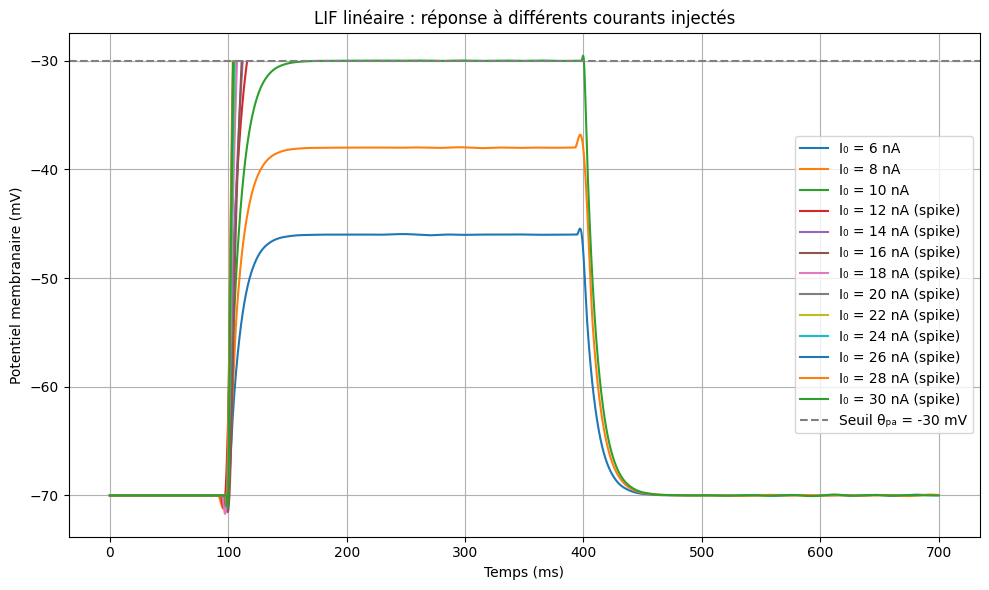

Rhéobase détecté à I₀ ≈ 12.00 nA


In [21]:


# Paramètres fixes
tau = 10e-3          # s
u_r = -70e-3         # V
theta_pa = -30e-3    # V
Rm = 4e6             # ohms
t_span = (0, 0.7)
t_eval = np.linspace(*t_span, 10000)
u0 = [-70e-3]        # condition initiale


def I_carree(t, I0):
    return I0 if 0.1 <= t <= 0.4 else 0

def dudt_lif_linear(t, u, I0):
    return [(-(u[0] - u_r) + Rm * I_carree(t, I0)) / tau]

# Détection du spike
def spike_event(t, u):
    return theta_pa - u[0]
spike_event.terminal = True
spike_event.direction = -1

# Test de différentes valeurs de I0
I_values = np.linspace(6e-9, 30e-9, 13)  # de 6 à 30 nA
rheobase_found = False

plt.figure(figsize=(10, 6))

for I0 in I_values:
    sol = solve_ivp(
        lambda t, u: dudt_lif_linear(t, u, I0),
        t_span, u0, t_eval=t_eval,
        events=spike_event
    )

    label = f"I₀ = {I0*1e9:.0f} nA"

    if sol.t_events[0].size > 0:
        if not rheobase_found:
            rheobase_found = True
            I_rheo = I0
        label += " (spike)"

    plt.plot(sol.t * 1e3, sol.y[0] * 1e3, label=label)

# Tracé final
plt.axhline(theta_pa * 1e3, linestyle='--', color='gray', label="Seuil θₚₐ = -30 mV")
plt.xlabel("Temps (ms)")
plt.ylabel("Potentiel membranaire (mV)")
plt.title("LIF linéaire : réponse à différents courants injectés")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

if rheobase_found:
    print(f"Rhéobase détecté à I₀ ≈ {I_rheo * 1e9:.2f} nA")
else:
    print("Aucun spike détecté dans les valeurs testées.")
